In [1]:
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.lens_pop import LensPop
from astropy import units as u
import numpy as np
from slsim.image_simulation import lens_image_series
from slsim.Plots.plot_functions import create_image_montage_from_image_list

## Supernovae plus extended source simulation
In this notebook, we simulate population of lensed supernovae and simulate image of a 

random lensed supernovae. It follows following steps:

1. Simulate lensed supernovae population
2. Choose a lens at random
3. Set observation time and other image configuration
4. Simulate image of a selected lens
5. Visualize it

## Simulate lensed supernovae population

In [2]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


# define a sky area
sky_area = Quantity(value=1, unit="deg2")


# define limits in the intrinsic deflector and source population (in addition to the
# skypy config
# file)
kwargs_deflector_cut = {"z_min": 0.01, "z_max": 2.5}
kwargs_source_cut = {}
## create a point plus extended source lens population.
supernova_lens_pop = LensPop(
    deflector_type="all-galaxies",
    source_type="supernovae_plus_galaxies",
    kwargs_deflector_cut=kwargs_deflector_cut,
    kwargs_source_cut=kwargs_source_cut,
    variability_model="light_curve",
    kwargs_variability={"peak_apparent_magnitude", "i"},  # specify kewords for
    # lightcurve. "i" is a band for the lightcurve.
    kwargs_mass2light=None,
    skypy_config=None,
    sky_area=sky_area,
    cosmo=cosmo,
    source_sersic_profile="double",
    catalog_type="scotch",
    peak_mag_limit={"peak_mag_min": -20, "peak_mag_max": -17},
    lightcurve_time=100 * u.day,
)

## Choose a random lens

In [3]:
kwargs_lens_cut = {"min_image_separation": 1, "max_image_separation": 10}
rgb_band_list = ["i", "r", "g"]
lens_class = supernova_lens_pop.select_lens_at_random(**kwargs_lens_cut)

/Users/narayankhadka/slsim/slsim/Sources/simple_supernova_lightcurve.py:39: RuntimeWarning: divide by zero encountered in log10
  apparent_magnitudes = -2.5 * np.log10(flux)
/Users/narayankhadka/slsim/slsim/Sources/simple_supernova_lightcurve.py:39: RuntimeWarning: invalid value encountered in log10
  apparent_magnitudes = -2.5 * np.log10(flux)


## Set observation time and image configuration

In [5]:
time = np.linspace(20, 90, 4)

# load your psf kernel and transform matrix. If you have your own psf, please provide
# it here.
psf_kernel = np.load(
    "/Users/narayankhadka/slsim/tests/TestData/psf_kernels_for_deflector.npy"
)
transform_matrix = np.array([[0.2, 0], [0, 0.2]])

# let's set up psf kernel for each exposure. Here we have taken the same psf that we
# extracted above. However, each exposure can have different psf kernel and user should
# provide corresponding psf kernel to each exposure.
psf_kernels_all = np.array([psf_kernel, psf_kernel, psf_kernel, psf_kernel])

# let's set pixel to angle transform matrix. Here we have taken the same matrix for
# each exposure but user should provide corresponding transform matrix to each exposure.
transform_matrix_all = np.array(
    [transform_matrix, transform_matrix, transform_matrix, transform_matrix]
)

# provide magnitude zero point for each exposures. Here we have taken the same magnitude
#  zero point for each exposure but user should provide the corresponding magnitude
# zero point for each exposure.
mag_zero_points_all = np.array([27.0, 27.0, 27.0, 27.0])

exposure_time_all = np.array([30, 30, 30, 30])

## Simulate Image

In [6]:
# Simulate a lens image
image_lens_series = lens_image_series(
    lens_class=lens_class,
    band="i",
    mag_zero_point=mag_zero_points_all,
    num_pix=64,
    psf_kernel=psf_kernels_all,
    transform_pix2angle=transform_matrix_all,
    exposure_time=exposure_time_all,
    t_obs=time,
)

/Users/narayankhadka/lenstronomy/lenstronomy/Data/psf.py:80: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(


## Visualize simulated images

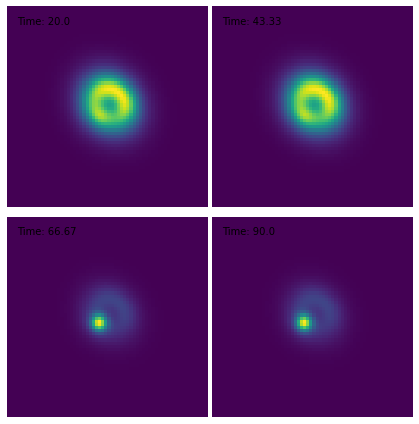

In [7]:
plot_montage = create_image_montage_from_image_list(
    num_rows=2, num_cols=2, images=image_lens_series, time=time
)